# Long Drive Budget Planning 
## Data gathering
Gathering the required data for designing our Destination and Fuel cost table.

For our Sample data we would be considering ``` Maruti Wagon R VXI AT Car  ```.<br>
<img src = "datafiles/wagonr.avif" alt= "Pic of car"  width="500px" height="500px" style="border: 1px solid black; display: block;margin: 0 auto;">
The details would be referring from the below image: 
<img src = "datafiles/Mileage_data.png" alt= "Details of a car"  width="500px" height="500px" style="border: 1px solid black; display: block;margin: 0 auto;">

## Data PreProcessing 
From the above details we obtained
| Details | Output |
|---|---|
| Mileage | 25.9 |
| Fuel type | Petrol |
| Full tank | 32 |
| Total km | 828.8 |

From the <em>internet</em>, The **Avg Price of Diesel** = `Rs.94/L `

## Sample Data 
We would be travelling from $$ A{\rightarrow} B $$
which consist of $x$ km and costs ${\$}y$. So our $$(x,y)$$ would be **distance** and **Fuel cost**.
~~|                |Distance ${_x}$ | Cost ${_y}$ |~~
~~|----------------|---------------- |-------------|~~
~~Delhi-Lonavala   |      1487       |      9280  |~~
~~Pune-lonavala    |       63.8      |      397   |~~
~~Hyd-kakinada     |       489       |      3044  |~~



So this would be our sample data.

 ### Disclamier :  Changing our Sample Data

In [1]:
def fuelCalculator(distance,mileage = 25.9,price = 94):
    return (distance/mileage) * price

In [2]:
#Importing Libraries
import numpy as np 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt 
import glob
import pandas as pd 
import csv
# X_train = np.array([1487,63.8,489,588])
# y_train = np.array([9256,397,3044,3660])
# print(X_train.shape,y_train.shape)
# print(fuelCalculator(1487))

### Importing the data 
The data is imported and loaded using pandas and numpy methods below

In [3]:
#Importing data 
## Importing csv_file and Loading the data to numpy (Vizag.csv)

df_1 = pd.read_csv("datafiles/Vizag.csv")
df_2 = pd.read_csv("datafiles/Vijawada.csv")
df_2

,City,DISTANCE (Kms),City.1,DISTANCE (Kms).1,City.2,DISTANCE (Kms).2
0,Agartala,2928,Guntur,32,Nellore,224.0
1,Agra,1563,Gurgaon,1759,Panaji,873.0
2,Ahmedabad,1475,Guwahati,2290,Paradwip,931.0
3,Aizawl,2554,Gwalior,1372,Pathankot,1830.0
4,Ajmer,1829,Haldia,1232,Patna,1626.0
5,Akola,766,Hasan,740,Pondicherry,593.0
6,Aligarh,1646,Hissar,1862,Porbandar,1869.0
7,Allahabad,1423,Hubli,586,Pune,815.0
8,Ambala,1957,Hyderabad,267,Purulia,1274.0
9,Amritsar,2212,Imphal,2774,Raipur,965.0


Extracting the last column as it contains the values of distance.

In [4]:
# df_1,df_2 = dataframes[0],dataframes[1]
# print(type(df))
# lastCol = df_1.columns[-1]
# X_train,X_test= np.array(df_1[lastCol]),np.array(df_2[lastCol])
# X_train,X_test

def data_processing(dataframe):
    ''' 
    args:
    dataframe : Pandas Dataframe which consist of a csv 
                file in the format of city and distance repeating thrice(city,distance,city,distance,city,distance)
    return:
    arr : A numpy array of Distances after data cleaning
    '''
    even_columns = dataframe.columns[1::2]
    even_columns_array = dataframe[even_columns].to_numpy()
    return even_columns_array 

In [5]:
#Loading the data 
X_train,X_test = data_processing(df_1),data_processing(df_2)
#Get the output from computing the X with the function 
#When np.apply is used, the function computes every element from the numpy array
y_train = np.vectorize(fuelCalculator)(X_train)

As you can see there are some **nan** values. Remove them to prevent any abruption.

In [6]:

def check_nan(arr):
## Use the `np.isnan()` function to create a boolean array
# that indicates where NaN values are located
    is_nan = np.isnan(arr)
# Use the `np.where()` function to select all the non-NaN values
# and store them in a new array
    arr = arr[~is_nan]
    return arr 

X_train,X_test,y_train = check_nan(X_train),check_nan(X_test),check_nan(y_train)

## Normalize/Scale the Data

In [7]:
#### This cell has been added at the end as to emphasize the importance of Normalisiing the data ######
#Before Fitting to the model , we need to reshape the data
X_train_shape = X_train.reshape((-1,1))

#Calculating mean and standard deviation for single data points
mean,sigma = np.mean(X_train),np.std(X_train)
#Normalise the data 
scale = StandardScaler()
X_train_norm = scale.fit_transform(X_train_shape)
X_train_norm.shape


(136, 1)

## Apply the gradient Descent 
SGDRegressor is used to apply the gradient descent

In [8]:

#Training our model by fitting to the linear model
gradient_descent = SGDRegressor(max_iter=1000)
gradient_descent.fit(X_train_norm,y_train)

SGDRegressor()

In [9]:
#Extracting weights and bias from gradient Descent 
w_norm = gradient_descent.coef_
b_norm = gradient_descent.intercept_
print(f"The weights and the bias would be w : {w_norm} and b : {b_norm} respectively")

The weights and the bias would be w : [2055.4610855] and b : [5198.74713015] respectively


## Predict the data

In [10]:
#Predicting the data 
y_pred = gradient_descent.predict(X_train_norm)
print(y_pred,y_train,sep="\n")
print(y_pred-y_train)

[9239.86738402 1502.9122987  2315.80063787 6086.29610393 6797.57340071
 4554.87253639 6743.13891371 6924.5872037  1992.82268169 7882.63417487
 5222.60224357 8546.73491624 7697.55691907 3085.14138745 4609.30702339
 3818.19247902 4362.537349   3538.76211243 6387.50026532 7418.12655248
 8172.95143886 4464.14839139 3876.25593182 4348.0214858  7516.10862908
 2359.34822747 3237.55795104 8441.49490805 8681.00665084 2141.61027948
 3622.22832583 4747.20772378 7526.99552648 4039.55939281 3455.29589903
 5088.33050897 4395.1980412  6547.17476052 3560.53590723 3683.92074442
 8325.36800245 3186.75242984 4798.01324498 8140.29074666 2754.90549966
 3313.76623284 8935.03425683 6630.64097391 6855.6368535  7839.08658527
 4152.05733261 4217.378717   2972.64344765 7294.74171529 3114.17311384
 4870.59256098 4123.02560621 4449.63252819 7458.04517628 2214.18959548
 7421.75551828 8024.16384106 5941.13747194 4761.72358698  588.41291714
 5200.82844877 1542.8309225  8067.71143066 7287.48378369 8543.10595044
 5418.

### Measuring Accuracy for Training Data

In [11]:
#Measuring the accuracy 
# model evaluation for training set

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for training set
--------------------------------------
MAE is 0.17336809275698783
MSE is 0.04622856812127455
R2 score is 0.9999999890603987
Accuracy : 99.999999%


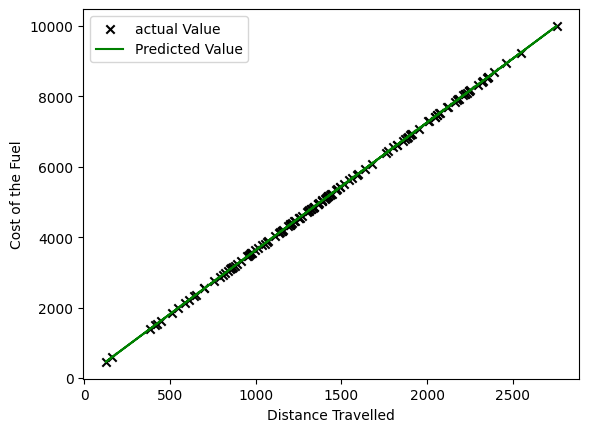

In [12]:
# print(X_train,y_train,y_pred,sep=" ")
plt.scatter(X_train,y_train,marker='x',c='black',label='actual Value')
plt.plot(X_train,y_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

In [13]:
#Predicting for a new value
X_test_new = X_test.reshape((-1,1))
X_test_norm = scale.fit(X_test_new)
X_test_norm = scale.transform(X_test_new)
# print(X_test_norm[:10])

### Computating Z_Score normalisation instead of scale.transform() for better accuracy #####

# X_test_norm = (X_test_new - mean) / sigma
# print(X_test_new)
y_test = np.vectorize(fuelCalculator)(X_test)
y_test_pred = gradient_descent.predict(X_test_norm)
print(X_test[:10],y_test[:10],y_test_pred[:10],sep="\n")


[2928.   32.  224. 1563. 1759.  873. 1475. 2290.  931. 2554.]
[10626.71814672   116.13899614   812.97297297  5672.66409266
  6384.01544402  3168.41698842  5353.28185328  8311.1969112
  3378.91891892  9269.34362934]
[10354.16188844   872.17780758  1500.81763615  5884.92560724
  6526.6620989   3625.75122333  5596.79901914  8265.24412477
  3815.65283821  9129.62388905]


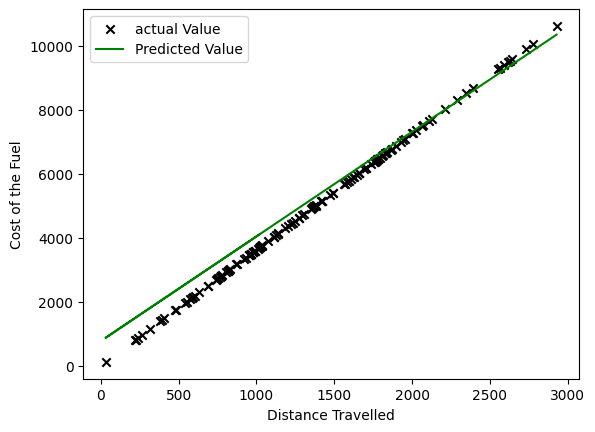

In [14]:
# print(X_test,y_test,y_pred,sep=" ")
plt.scatter(X_test,y_test,marker='x',c='black',label='actual Value')
plt.plot(X_test,y_test_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

### Measuring the accuracy for testing Data

In [15]:
# model evaluation for testing set

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for testing set
--------------------------------------
MAE is 313.7532496005083
MSE is 131912.85625479123
R2 score is 0.9745894681173859
Accuracy : 97.458947%


In [16]:
# # Get the dimensions of the arrays
# n1, m1 = X_train_shape.shape
# header_columns = ["Distance", "Fuel(Pred)", "Fuel(Actual)"]

# # Create a CSV file
# file = open("datafiles/output.csv", "w")
# writer = csv.writer(file)

# # Write the header row
# writer.writerow(header_columns)

# # Write the arrays to the CSV file
# for i in range(n1):
#   writer.writerow([X_train[i],y_pred[i],y_train[i]])

# # Close the CSV file
# file.close()


In [17]:
# # Get the dimensions of the arrays
# n1, m1 = X_train_shape.shape


# # Create a CSV file
# file = open("datafiles/output_test.csv", "w")
# writer = csv.writer(file)

# # Write the header row
# writer.writerow(header_columns)

# # Write the arrays to the CSV file
# for i in range(n1):
#   writer.writerow([X_test[i],y_test[i],y_test_pred[i]])

# # Close the CSV file
# file.close()